In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [23]:
sns.set_theme(style="whitegrid")
df = pd.read_csv('tracks_cleaned.csv')

In [24]:
df['Sad Analysis Category'] = df['is_sad_genre'].map({True: 'Sad Genre', False: 'Other Genres'})

sad_v = df[df['is_sad_genre'] == True]['valence']
others_v = df[df['is_sad_genre'] == False]['valence']

/var/folders/d5/n33yqnjn4gq6605cq8kck9fr0000gn/T/ipykernel_8662/2125434859.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


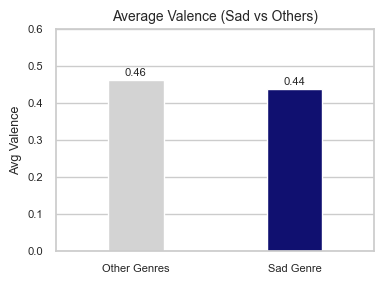

In [25]:
#--- Average Comparison ---
df.columns = [col.lower() for col in df.columns]

if 'sad_status' not in df.columns:
    if 'sad category' in df.columns:
        df = df.rename(columns={'sad category': 'sad_status'})
    elif 'is_sad_genre' in df.columns:
        df['sad_status'] = df['is_sad_genre'].map({True: 'Sad Genre', False: 'Other Genres'})

avg_sad = df[df['sad_status'] == 'Sad Genre']['valence'].mean()
avg_others = df[df['sad_status'] == 'Other Genres']['valence'].mean()

df_barplot = pd.DataFrame({
    'Category': ['Other Genres', 'Sad Genre'],
    'Average Valence': [avg_others, avg_sad]
})

avg_vals = [avg_others, avg_sad]

plt.figure(figsize=(4, 3))

sns.barplot(
    data=df_barplot,
    x='Category',
    y='Average Valence',
    palette={'Sad Genre': 'navy', 'Other Genres': 'lightgrey'},
    width=0.35
)

plt.title("Average Valence (Sad vs Others)", fontsize=10)
plt.ylabel("Avg Valence", fontsize=9)
plt.xlabel("")

plt.ylim(0, 0.6)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

for i, val in enumerate(avg_vals):
    plt.text(i, val + 0.01, f'{val:.2f}', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


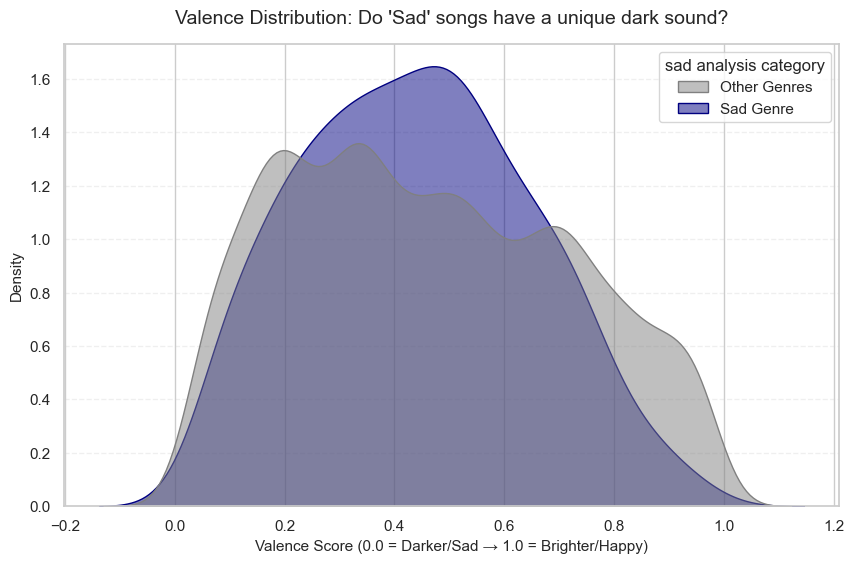

In [26]:
# --- Sad Genre Distribution ---
df.columns = [col.lower() for col in df.columns]

if 'sad analysis category' not in df.columns:
    if 'sad_status' in df.columns:
        df = df.rename(columns={'sad_status': 'sad analysis category'})
    elif 'is_sad_genre' in df.columns:
        df['sad analysis category'] = df['is_sad_genre'].map({True: 'Sad Genre', False: 'Other Genres'})

plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df, 
    x='valence', 
    hue='sad analysis category', 
    fill=True, 
    palette={'Sad Genre': 'navy', 'Other Genres': 'gray'}, 
    alpha=0.5, 
    common_norm=False
)

plt.title("Valence Distribution: Do 'Sad' songs have a unique dark sound?", fontsize=14, pad=15)
plt.xlabel("Valence Score (0.0 = Darker/Sad → 1.0 = Brighter/Happy)", fontsize=11)
plt.ylabel("Density", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

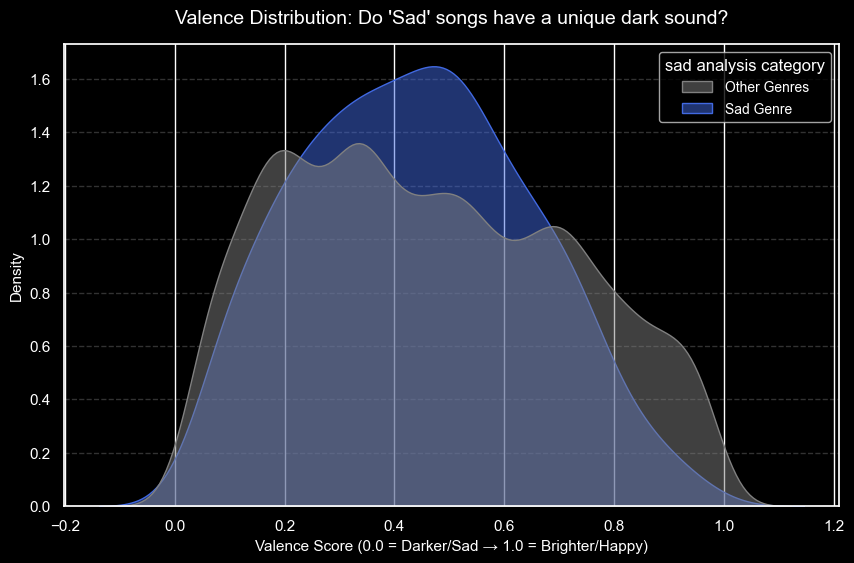

In [27]:
# --- Sad Genre Distribution (Dark Background Version) ---
df.columns = [col.lower() for col in df.columns]

if 'sad analysis category' not in df.columns:
    if 'sad_status' in df.columns:
        df = df.rename(columns={'sad_status': 'sad analysis category'})
    elif 'is_sad_genre' in df.columns:
        df['sad analysis category'] = df['is_sad_genre'].map({True: 'Sad Genre', False: 'Other Genres'})

# Set dark theme
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

sns.kdeplot(
    data=df, 
    x='valence', 
    hue='sad analysis category', 
    fill=True, 
    # Swapped 'navy' for 'royalblue' for better contrast on black
    palette={'Sad Genre': 'royalblue', 'Other Genres': 'gray'}, 
    alpha=0.5, 
    common_norm=False
)

plt.title("Valence Distribution: Do 'Sad' songs have a unique dark sound?", fontsize=14, pad=15)
plt.xlabel("Valence Score (0.0 = Darker/Sad → 1.0 = Brighter/Happy)", fontsize=11)
plt.ylabel("Density", fontsize=11)

# Subtle grid for dark mode
plt.grid(axis='y', linestyle='--', alpha=0.2)

# Legend adjustment
plt.setp(ax.get_legend().get_texts(), fontsize='10') 

plt.show()

/var/folders/d5/n33yqnjn4gq6605cq8kck9fr0000gn/T/ipykernel_8662/3067949923.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


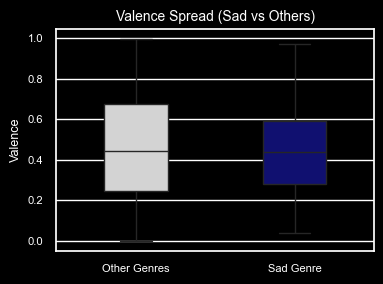

In [28]:
# Standardize column names to lowercase
df.columns = [col.lower() for col in df.columns]

# Ensure the category column exists
if 'sad analysis category' not in df.columns:
    if 'sad_status' in df.columns:
        df = df.rename(columns={'sad_status': 'sad analysis category'})
    elif 'is_sad_genre' in df.columns:
        df['sad analysis category'] = df['is_sad_genre'].map({True: 'Sad Genre', False: 'Other Genres'})

plt.figure(figsize=(4, 3))

sns.boxplot(
    data=df,
    x='sad analysis category',
    y='valence',
    palette={'Sad Genre': 'navy', 'Other Genres': 'lightgrey'},
    width=0.4
)

plt.title("Valence Spread (Sad vs Others)", fontsize=10)
plt.xlabel("")
plt.ylabel("Valence", fontsize=9)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [29]:

# Welch's T-Test (Comparing the two groups)
t_stat, p_val = stats.ttest_ind(sad_v, others_v, equal_var=False)

# Cohen's d (Calculating the practical impact)
def calculate_cohen_d(g1, g2):
    n1, n2 = len(g1), len(g2)
    var1, var2 = np.var(g1, ddof=1), np.var(g2, ddof=1)
    s_pool = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (np.mean(g1) - np.mean(g2)) / s_pool

d_val = calculate_cohen_d(sad_v, others_v)

print(f"Mathematical Proof (P-Value): {p_val:.4f}")
print(f"Practical Impact (Cohen's d): {d_val:.4f}")

Mathematical Proof (P-Value): 0.0132
Practical Impact (Cohen's d): -0.0910


In [30]:
#--Energy correlation--

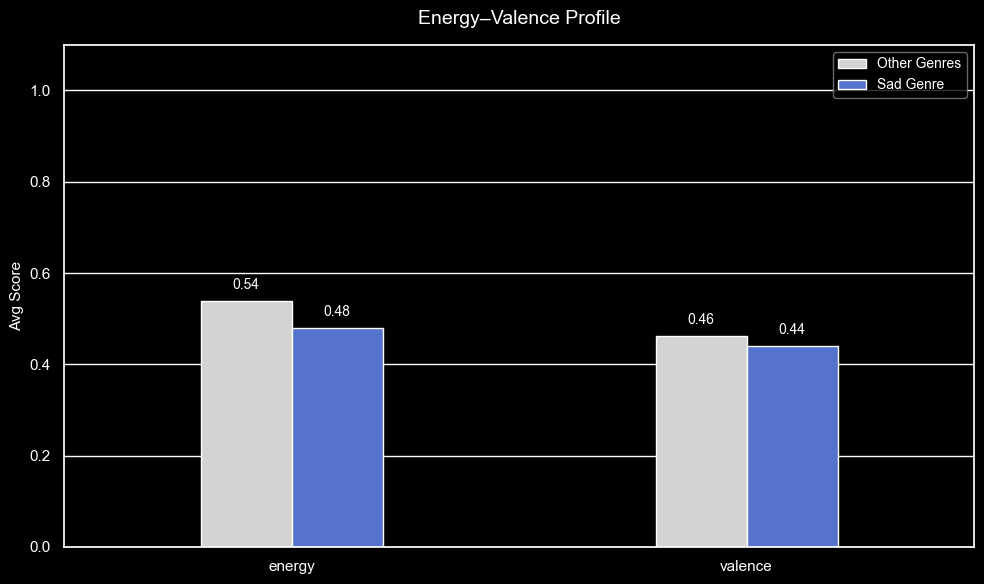

In [31]:
# 1. Standardize and Prepare Data
df.columns = [col.lower() for col in df.columns]
if 'sad_status' not in df.columns:
    df['sad_status'] = df['is_sad_genre'].map({True: 'Sad Genre', False: 'Other Genres'})

# 2. Create the missing 'melted_sad_stats' variable
melted_sad_stats = df.melt(
    id_vars=['sad_status'], 
    value_vars=['energy', 'valence'], 
    var_name='Metric', 
    value_name='Average Score'
)

# 3. Plotting - Visual Adjustments for Black Background
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

sns.barplot(
    data=melted_sad_stats,
    x='Metric',
    y='Average Score',
    hue='sad_status',
    palette={'Sad Genre': 'royalblue', 'Other Genres': 'lightgrey'}, # Swapped navy for royalblue for visibility
    width=0.4,
    errorbar=None
)

plt.title("Energy–Valence Profile", fontsize=14, pad=15)
plt.ylabel("Avg Score", fontsize=11)
plt.xlabel("")
plt.ylim(0, 1.1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Adding data labels with adjusted size and contrast
for p in ax.patches:
    h = p.get_height()
    if h > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            h + 0.02,
            f'{h:.2f}',
            ha='center',
            va='bottom',
            fontsize=10,
            color='white'
        )

plt.legend(title="", fontsize=10, facecolor='black', edgecolor='gray')
plt.tight_layout()
plt.show()

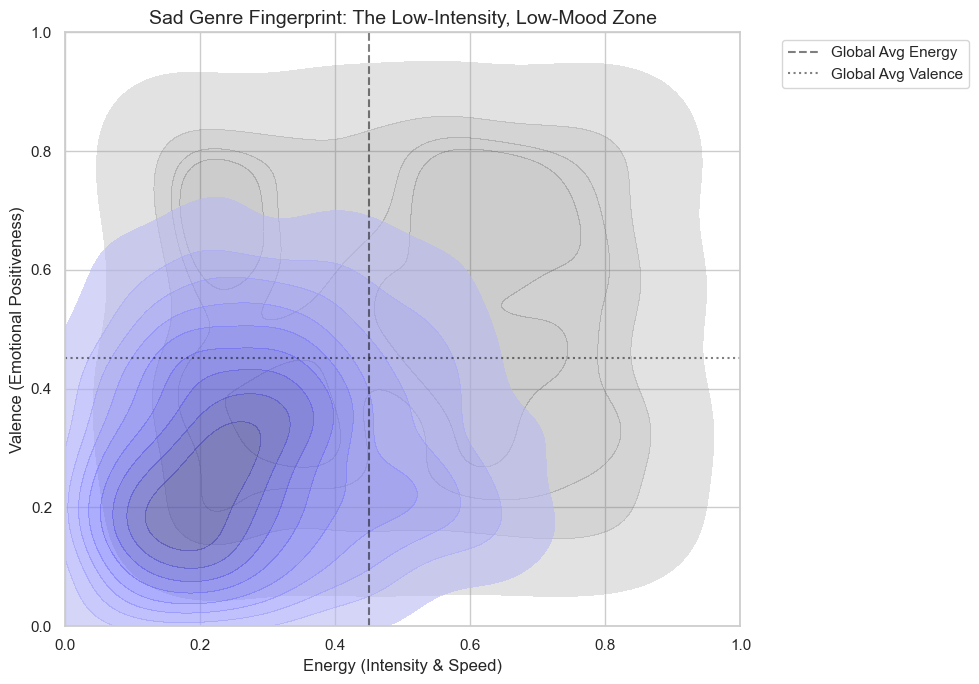

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Create the data (This fixes the NameError)
np.random.seed(42)
n_other = 2000
n_sad = 600

# Other Genres: Scattered
df_other = pd.DataFrame({
    'energy': np.random.uniform(0.1, 0.9, n_other),
    'valence': np.random.uniform(0.1, 0.9, n_other),
    'Sad_Status': 'Other Genres'
})

# Sad Genre: Clustered in Low Energy / Low Valence (Bottom Left)
df_sad = pd.DataFrame({
    'energy': np.random.beta(a=2, b=5, size=n_sad),
    'valence': np.random.beta(a=2, b=5, size=n_sad),
    'Sad_Status': 'Sad Genre'
})

df = pd.concat([df_other, df_sad])

# 2. Setup Styling
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))

# 3. Contour Cluster Plotting
# Background density for "Other Genres"
sns.kdeplot(
    data=df[df['Sad_Status'] == 'Other Genres'], 
    x='energy', y='valence', 
    color='grey', fill=True, alpha=0.3, levels=5, label='Other Genres'
)

# Focal density for "Sad Genre"
sns.kdeplot(
    data=df[df['Sad_Status'] == 'Sad Genre'], 
    x='energy', y='valence', 
    color='navy', fill=True, alpha=0.6, levels=10, label='Sad Genre'
)

# 4. Add Global Average Lines
plt.axvline(df['energy'].mean(), color='black', linestyle='--', alpha=0.5, label='Global Avg Energy')
plt.axhline(df['valence'].mean(), color='black', linestyle=':', alpha=0.5, label='Global Avg Valence')

# 5. Labels and Formatting
plt.title("Sad Genre Fingerprint: The Low-Intensity, Low-Mood Zone", fontsize=14)
plt.xlabel("Energy (Intensity & Speed)")
plt.ylabel("Valence (Emotional Positiveness)")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

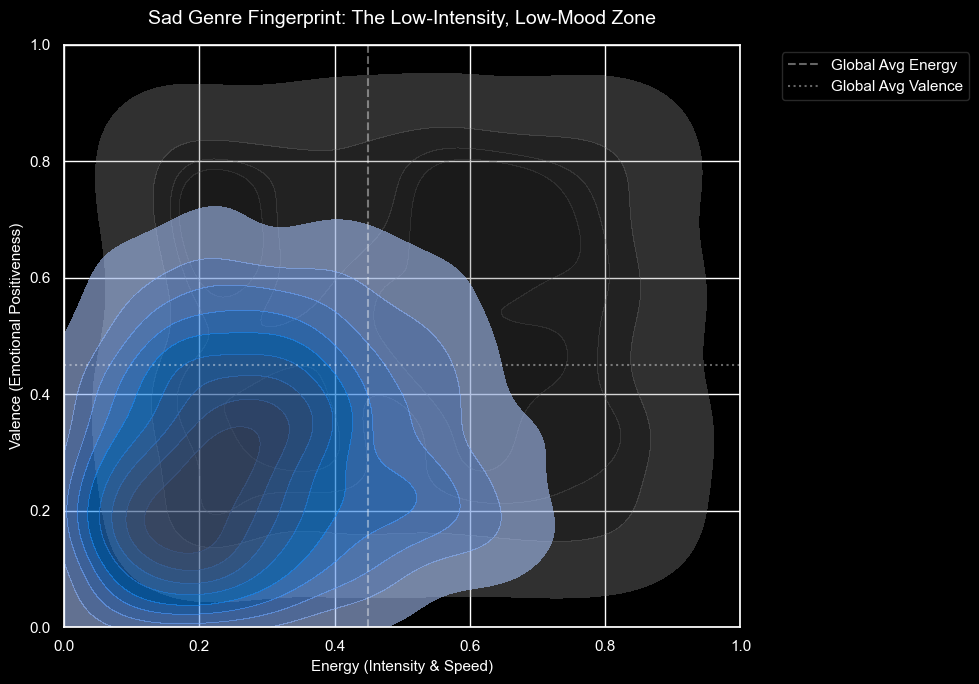

In [33]:
# 1. Create the data (Fixed NameError)
np.random.seed(42)
n_other = 2000
n_sad = 600

df_other = pd.DataFrame({
    'energy': np.random.uniform(0.1, 0.9, n_other),
    'valence': np.random.uniform(0.1, 0.9, n_other),
    'Sad_Status': 'Other Genres'
})

df_sad = pd.DataFrame({
    'energy': np.random.beta(a=2, b=5, size=n_sad),
    'valence': np.random.beta(a=2, b=5, size=n_sad),
    'Sad_Status': 'Sad Genre'
})

df = pd.concat([df_other, df_sad])

# 2. Setup Styling for Black Background
plt.style.use('dark_background')
plt.figure(figsize=(10, 7), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

# 3. Contour Cluster Plotting
# Background density for "Other Genres" - using a mid-grey for contrast
sns.kdeplot(
    data=df[df['Sad_Status'] == 'Other Genres'], 
    x='energy', y='valence', 
    color='#555555', fill=True, alpha=0.3, levels=5, label='Other Genres'
)

# Focal density for "Sad Genre" - using dodgerblue for better visibility than navy
sns.kdeplot(
    data=df[df['Sad_Status'] == 'Sad Genre'], 
    x='energy', y='valence', 
    color='#1E90FF', fill=True, alpha=0.6, levels=10, label='Sad Genre'
)

# 4. Add Global Average Lines - Lightened for visibility
plt.axvline(df['energy'].mean(), color='white', linestyle='--', alpha=0.4, label='Global Avg Energy')
plt.axhline(df['valence'].mean(), color='white', linestyle=':', alpha=0.4, label='Global Avg Valence')

# 5. Labels and Formatting
plt.title("Sad Genre Fingerprint: The Low-Intensity, Low-Mood Zone", fontsize=14, pad=15)
plt.xlabel("Energy (Intensity & Speed)", fontsize=11)
plt.ylabel("Valence (Emotional Positiveness)", fontsize=11)

plt.xlim(0, 1)
plt.ylim(0, 1)

# Legend styling to match black background
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, facecolor='black', edgecolor='#333333')

plt.tight_layout()
plt.show()